#Importing Libraries

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

In [171]:
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


#Encoding

In [172]:
df['Demented_label'] = df['Group'].apply(lambda x: 1 if str(x).strip().lower() == 'demented' else 0)
df['M/F_encoded'] = df['M/F'].apply(lambda x: 1 if str(x).strip().upper() == 'M' else 0)
df['Hand_encoded'] = df['Hand'].apply(lambda x: 0 if str(x).strip().upper() == 'R' else 1)
df['SES'].fillna(df['SES'].median(), inplace=True)
df.head()

/tmp/ipython-input-952291530.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SES'].fillna(df['SES'].median(), inplace=True)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented_label,M/F_encoded,Hand_encoded
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440,0,1,0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539,0,1,0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710,1,1,0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000,1,1,0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623,1,1,0


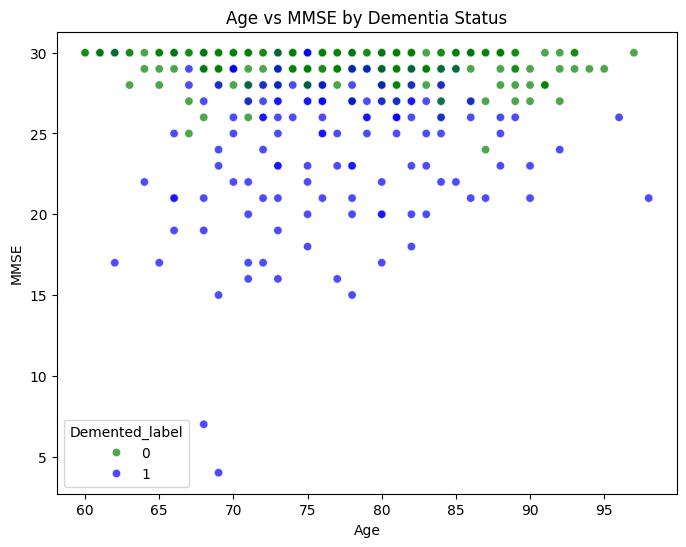

In [173]:
# Plot Age vs MMSE scatter plot with hue by Demented_label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='MMSE', hue='Demented_label', palette={0: 'green', 1: 'blue'}, alpha=0.7)
plt.title('Age vs MMSE by Dementia Status')
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.show()

In [174]:
# Fill missing SES values with median
df['SES'].fillna(df['SES'].median(), inplace=True)

feature_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F_encoded']

selected_features_df = df[feature_cols + ['Demented_label']]

print(selected_features_df.head())

   Age  EDUC  SES  MMSE  CDR         eTIV      nWBV       ASF  M/F_encoded  \
0   87    14  2.0  27.0  0.0  1986.550000  0.696106  0.883440            1   
1   88    14  2.0  30.0  0.0  2004.479526  0.681062  0.875539            1   
2   75    12  2.0  23.0  0.5  1678.290000  0.736336  1.045710            1   
3   76    12  2.0  28.0  0.5  1737.620000  0.713402  1.010000            1   
4   80    12  2.0  22.0  0.5  1697.911134  0.701236  1.033623            1   

   Demented_label  
0               0  
1               0  
2               1  
3               1  
4               1  


/tmp/ipython-input-4064170364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SES'].fillna(df['SES'].median(), inplace=True)


#Splitting Testing and Training Data

In [175]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
Y = df['Demented_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Train positive samples: {sum(y_train)}, Test positive samples: {sum(y_test)}")

Train samples: 298, Test samples: 75
Train positive samples: 117, Test positive samples: 29


#Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=['Nondemented', 'Demented']))


              precision    recall  f1-score   support

 Nondemented       1.00      0.96      0.98        46
    Demented       0.94      1.00      0.97        29

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



## 2D Representation of Results using PCA

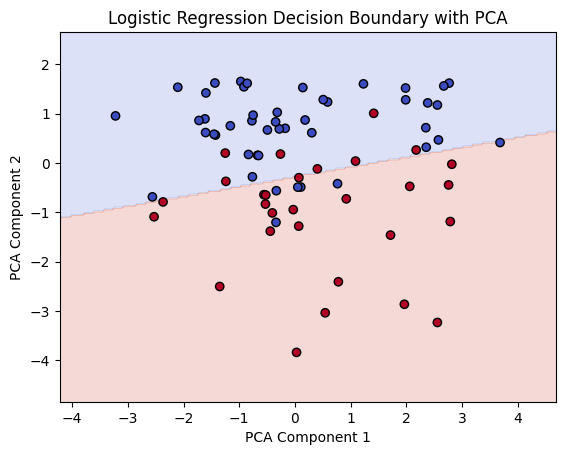

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)

def plot_logistic_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Logistic Regression Decision Boundary with PCA')
    plt.show()

plot_logistic_decision_boundary(X_test_pca, y_test, log_reg)


#Support Vector Machine (SVM)

In [178]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

svm_clf = SVC(kernel='rbf', gamma='scale', C=1)
svm_clf.fit(X_train_processed, y_train)

y_pred = svm_clf.predict(X_test_processed)
print(classification_report(y_test, y_pred, target_names=['Nondemented', 'Demented']))


              precision    recall  f1-score   support

 Nondemented       0.98      0.91      0.94        46
    Demented       0.88      0.97      0.92        29

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



##2D Representation of Results using PCA

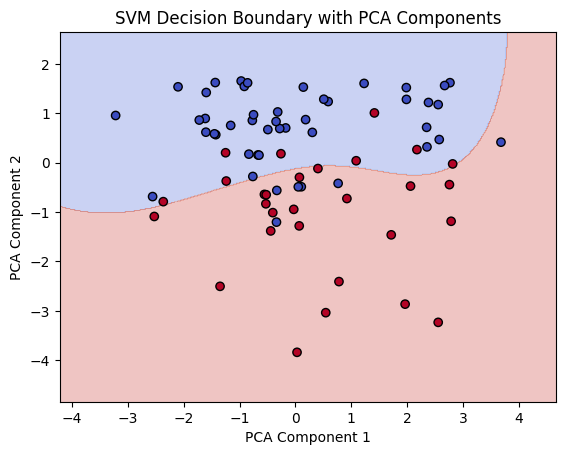

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_clf = SVC(kernel='rbf', gamma='scale', C=1)
svm_clf.fit(X_train_pca, y_train)

def plot_decision_boundary(X, y, model):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary with PCA Components')
    plt.show()

plot_decision_boundary(X_test_pca, y_test, svm_clf)


#Comparison between results of Logistic Regression and SVM

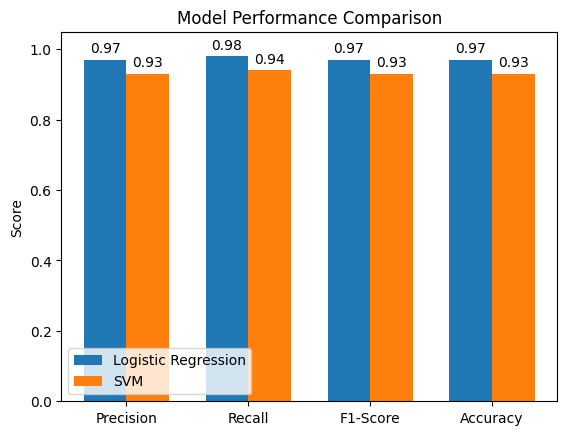

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Macro avg metrics from your results
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Logistic Regression (first image)
log_reg_scores = [0.97, 0.98, 0.97, 0.97]  # macro avg precision, recall, f1-score, and accuracy

# SVM (second image)
svm_scores = [0.93, 0.94, 0.93, 0.93]      # macro avg precision, recall, f1-score, and accuracy

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression')
bar2 = ax.bar(x + width/2, svm_scores, width, label='SVM')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()

def label_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
label_bars(bar1)
label_bars(bar2)

plt.show()
